In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math



In [2]:
used_car_df = pd.read_csv('used_cars.csv')

In [3]:
used_car_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [4]:
used_car_df.dtypes

brand           object
model           object
model_year       int64
milage          object
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price           object
dtype: object

# Data Cleansing

In [5]:
# extract mileage number and price numbers
used_car_df['mileage_num'] = used_car_df['milage'].str.extract(r'([\d,]+)')[0].str.replace(',', '').astype(float)
used_car_df['price_num'] = used_car_df['price'].str.extract(r'([\d,]+)')[0].str.replace(',', '').astype(float)


# Get rid of some anomalies
print(f'before getting rid of anomalies, there are {used_car_df.shape[0]} rows')
used_car_df = used_car_df[(used_car_df['price_num'] < 300000) & (used_car_df['mileage_num'] < 250000) ]
used_car_df = used_car_df[(used_car_df['price_num'] > 0) & (used_car_df['mileage_num'] > 0) ]
print(f'after getting rid of anomalies, there are {used_car_df.shape[0]} rows')



before getting rid of anomalies, there are 4009 rows
after getting rid of anomalies, there are 3966 rows


In [6]:
used_car_df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,mileage_num,price_num
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300",51000.0,10300.0
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005",34742.0,38005.0
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598",22372.0,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500",88900.0,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999",9835.0,34999.0


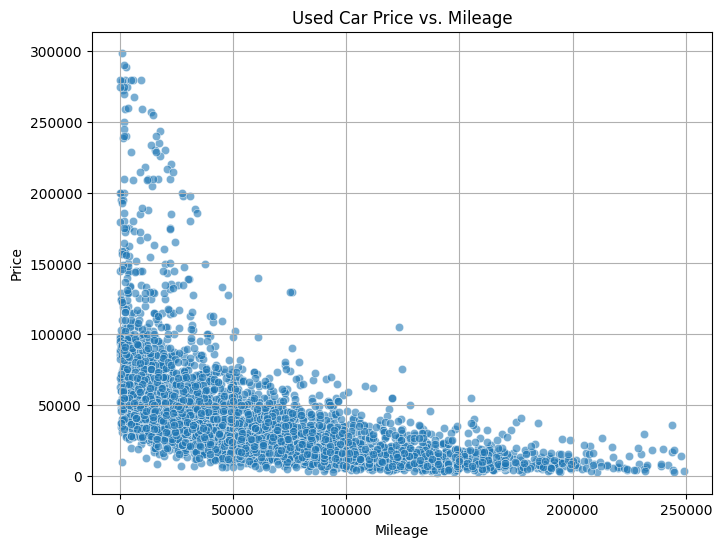

In [7]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=used_car_df, x="mileage_num", y="price_num", alpha=0.6)

# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Used Car Price vs. Mileage")
plt.grid(True)

# Show plot
plt.show()

# Let's try a Linear Regression model 

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


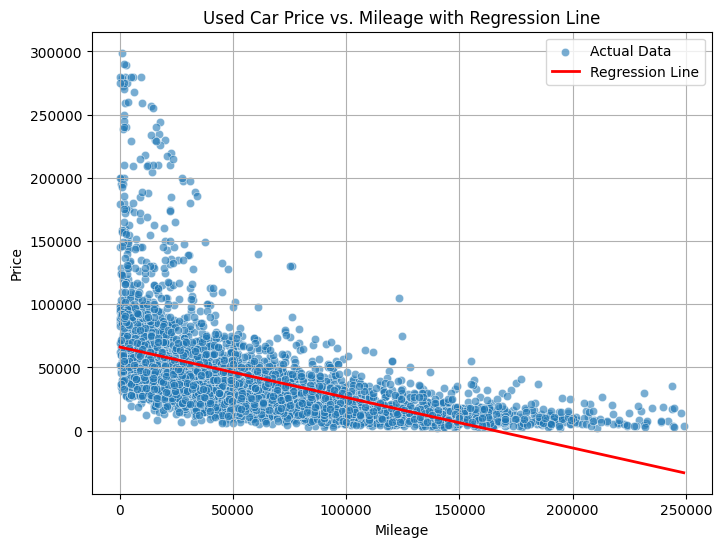

Model equation: Price = -0.40 * Mileage + 66101.33


In [8]:
# Prepare X and y
X = used_car_df[['mileage_num']]  
y = used_car_df['price_num']  

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Generate predictions for the regression line
mileage_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
price_pred = model.predict(mileage_range)

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=used_car_df, x="mileage_num", y="price_num", alpha=0.6, label="Actual Data")

# Plot regression line
plt.plot(mileage_range, price_pred, color="red", linewidth=2, label="Regression Line")

# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Used Car Price vs. Mileage with Regression Line")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

# Print model equation
print(f"Model equation: Price = {model.coef_[0]:.2f} * Mileage + {model.intercept_:.2f}")

### Model equation: Price = -0.40 * Mileage + 66101.33
### This looks like a terrible model

# Let's try KNN

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


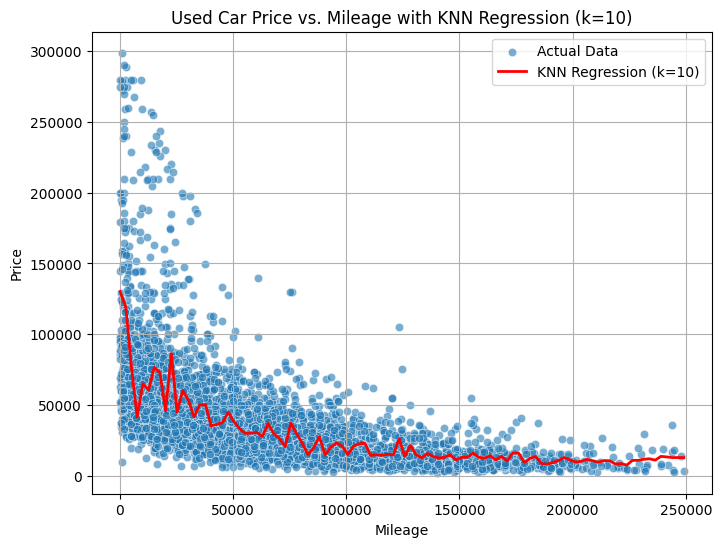

In [9]:
# Choose a k
k = 10

# Create and train KNN model
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X, y)

# Generate predictions
mileage_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
price_pred = knn.predict(mileage_range)

# Ensure prices are non-negative
price_pred = np.maximum(price_pred, 0)

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=used_car_df, x="mileage_num", y="price_num", alpha=0.6, label="Actual Data")

# Plot KNN regression curve
plt.plot(mileage_range, price_pred, color="red", linewidth=2, label=f"KNN Regression (k={k})")

# Labels and title
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title(f"Used Car Price vs. Mileage with KNN Regression (k={k})")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

In [10]:
# Choose a mileage 

mileage_example = np.array([[100000]])  # Reshape for model input

Linear_prediction = -0.40 * mileage_example[0, 0] + 66101.33

knn_prediction = knn.predict(mileage_example)[0]

print(f'Linear model shows the price of the car is {Linear_prediction}')
print(f'KNN model shows the price of the car is {knn_prediction}')

Linear model shows the price of the car is 26101.33
KNN model shows the price of the car is 17315.3


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


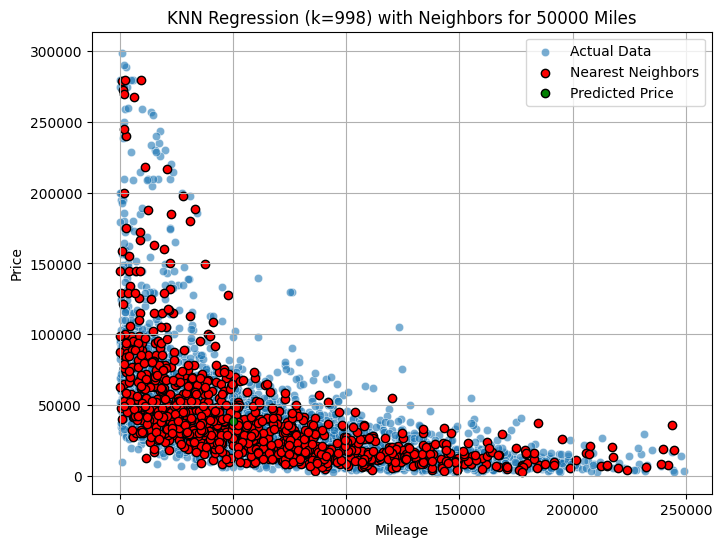

Linear model shows the price of the car is $46101.33
KNN model shows the price of the car is $38259.56


In [18]:
def plot_knn_with_neighbors(k, mileage_example):
    # Find k-nearest neighbors for the given mileage
    distances, indices = knn.kneighbors([[mileage_example]])  # Get indices of nearest points
    neighbor_mileages = used_car_df.iloc[indices.flatten()]['mileage_num']  # Get mileage values
    neighbor_prices = used_car_df.iloc[indices.flatten()]['price_num']  # Get corresponding prices

    # Plot scatter plot for all data
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=used_car_df, x="mileage_num", y="price_num", alpha=0.6, label="Actual Data")

    # Highlight the neighbor points in a different color
    plt.scatter(neighbor_mileages, neighbor_prices, color="red", edgecolors="black", label="Nearest Neighbors")

    # Mark the predicted price for the example mileage
    knn_prediction = knn.predict([[mileage_example]])[0]
    plt.scatter([mileage_example], [knn_prediction], color="green", edgecolors="black",label="Predicted Price")

    # Labels and title
    plt.xlabel("Mileage")
    plt.ylabel("Price")
    plt.title(f"KNN Regression (k={k}) with Neighbors for {mileage_example} Miles")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

    # Ensure non-negative predictions
    Linear_prediction = max(-0.40 * mileage_example + 66101.33, 0)
    knn_prediction = max(knn_prediction, 0)

    # Print results
    print(f'Linear model shows the price of the car is ${Linear_prediction:.2f}')
    print(f'KNN model shows the price of the car is ${knn_prediction:.2f}')

# Example usage
plot_knn_with_neighbors(k=k, mileage_example=50000)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


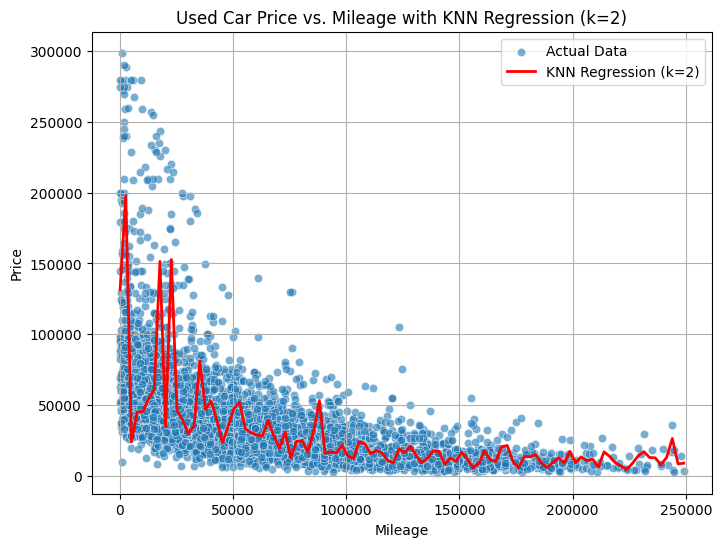

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


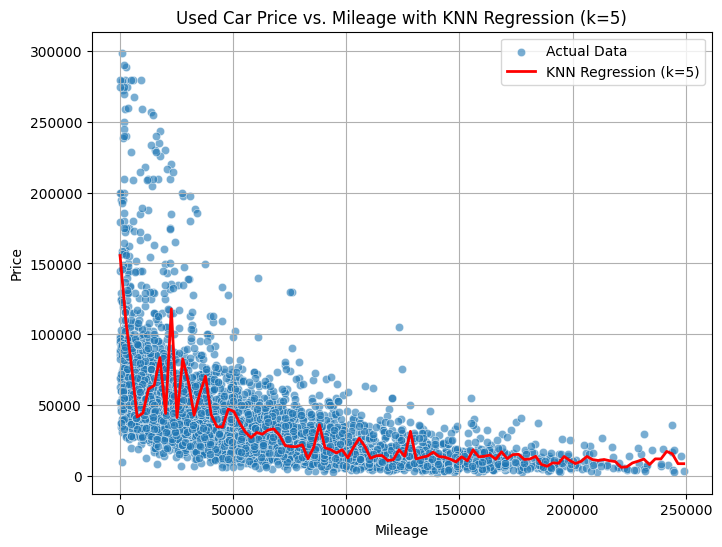

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


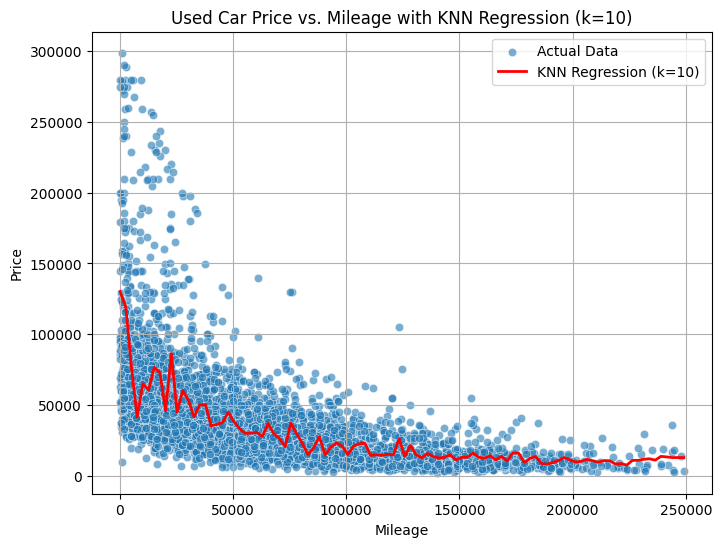

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


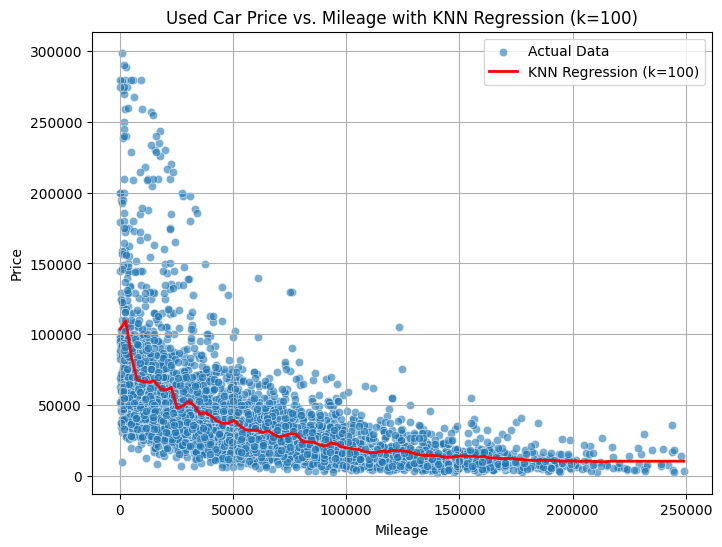

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


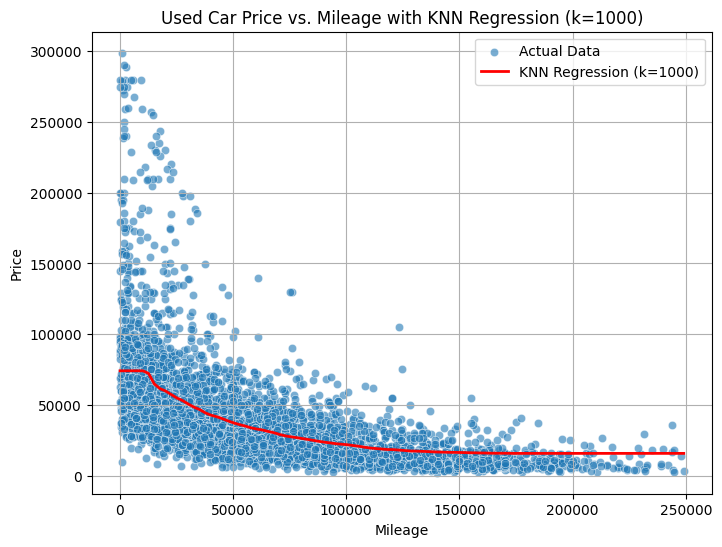

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


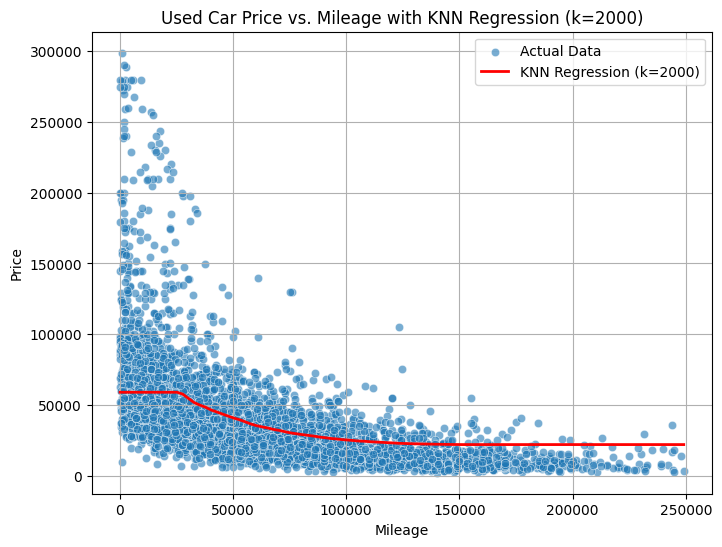

In [12]:
# define a function to plot with argument k, X, y
def knn_graph(k, X, y):

    # Create and train KNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)

    # Generate predictions
    mileage_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    price_pred = knn.predict(mileage_range)

    # Ensure prices are non-negative
    price_pred = np.maximum(price_pred, 0)

    # Plot scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=used_car_df, x="mileage_num", y="price_num", alpha=0.6, label="Actual Data")

    # Plot KNN regression curve
    plt.plot(mileage_range, price_pred, color="red", linewidth=2, label=f"KNN Regression (k={k})")

    # Labels and title
    plt.xlabel("Mileage")
    plt.ylabel("Price")
    plt.title(f"Used Car Price vs. Mileage with KNN Regression (k={k})")
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.show()

k_list = [2, 5, 10, 100, 1000, 2000]

for k_ in k_list:
    knn_graph(k_, X, y) 

In [13]:

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of k values to try
# k_values = list(range(2, 9, 2)) + list(range(10, 300, 20))
k_values = range(2, 1000, 2)
train_rmse = []
val_rmse = []

# RMSE Calculation Function
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Iterate over k values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict and compute RMSE for training and validation sets
    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)
    
    train_rmse.append(rmse(y_train, y_train_pred))
    val_rmse.append(rmse(y_val, y_val_pred))



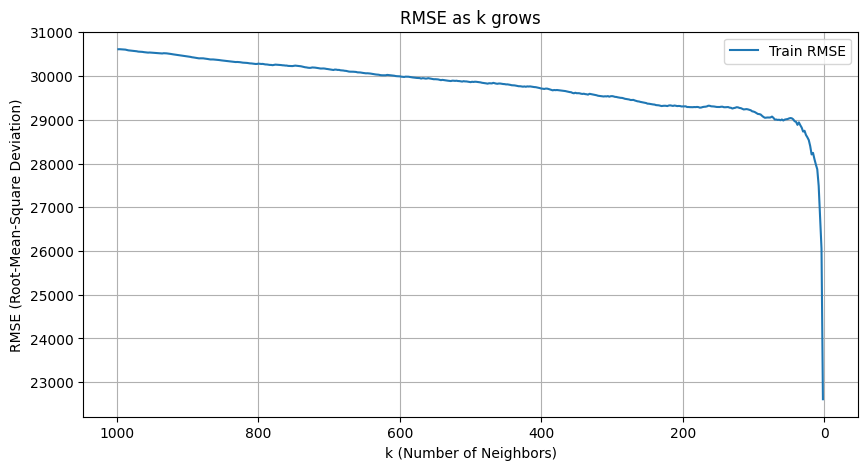

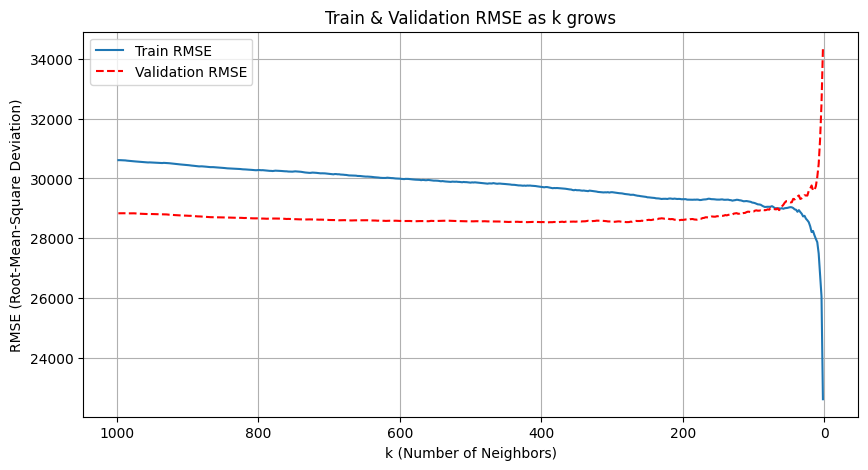

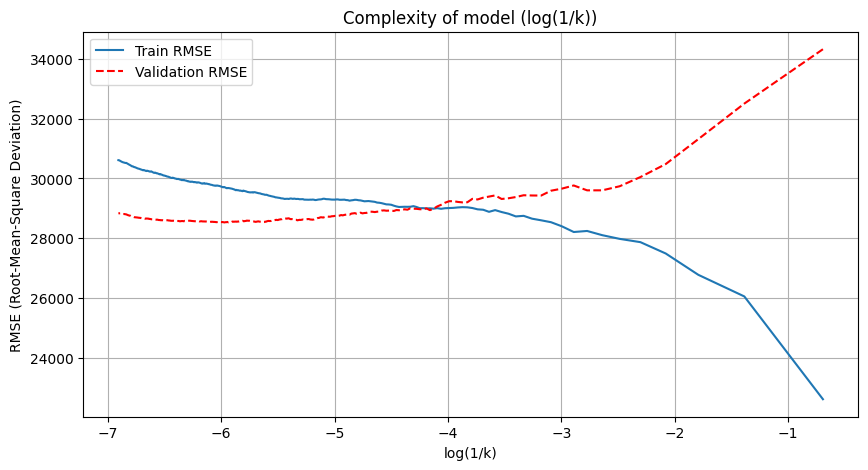

In [14]:
# Plot RMSE of training as k grows
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_rmse, linestyle='-', label='Train RMSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE (Root-Mean-Square Deviation)')
plt.title('RMSE as k grows')
plt.gca().invert_xaxis()
plt.legend()
plt.grid()
plt.show()

# Plot RMSE of training and validation as k grows
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_rmse, linestyle='-', label='Train RMSE')
plt.plot(k_values, val_rmse, linestyle='--', label='Validation RMSE', color='red')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('RMSE (Root-Mean-Square Deviation)')
plt.title('Train & Validation RMSE as k grows')
plt.gca().invert_xaxis()
plt.legend()
plt.grid()
plt.show()

log_k_values = (-1) * np.log(k_values)

# Plot RMSE of training and validation as k grows
plt.figure(figsize=(10, 5))
plt.plot(log_k_values, train_rmse, linestyle='-', label='Train RMSE')
plt.plot(log_k_values, val_rmse, linestyle='--', label='Validation RMSE', color='red')
plt.xlabel('log(1/k)')
plt.ylabel('RMSE (Root-Mean-Square Deviation)')
plt.title('Complexity of model (log(1/k))')
plt.legend()
plt.grid()
plt.show()


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


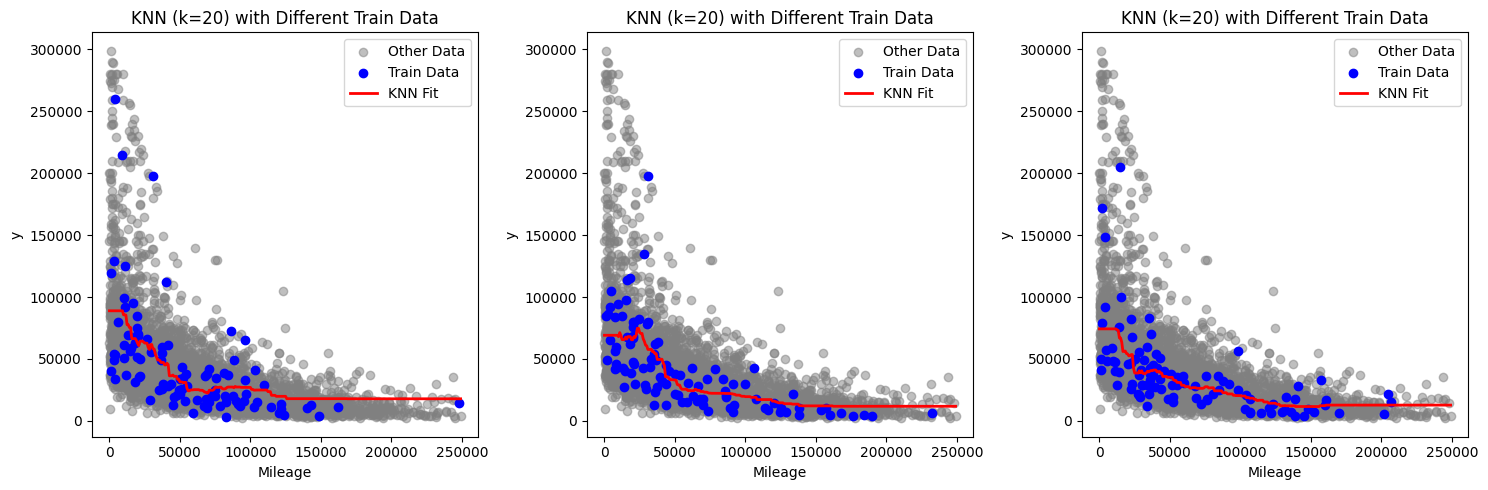

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Function to plot KNN fit with different train samples
def plot_knn(X, y, train_indices, ax):
    # Extract the training and test data
    X_train, y_train = X.loc[train_indices], y.loc[train_indices]  # Use .loc[] instead of .iloc[]
    X_test, y_test = X.drop(index=train_indices), y.drop(index=train_indices)
    
    # Train KNN model with k=2
    knn = KNeighborsRegressor(n_neighbors=20)
    knn.fit(X_train, y_train)

    # Predict across a smooth range of mileage values
    X_curve = np.linspace(X["mileage_num"].min(), X["mileage_num"].max(), 300).reshape(-1, 1)
    y_curve = knn.predict(X_curve)

    # Scatter plot
    ax.scatter(X_test, y_test, color='grey', alpha=0.5, label='Other Data')
    ax.scatter(X_train, y_train, color='blue', label='Train Data')
    ax.plot(X_curve, y_curve, color='red', linewidth=2, label='KNN Fit')

    # Labels and title
    ax.set_xlabel("Mileage")
    ax.set_ylabel("y")
    ax.set_title("KNN (k=20) with Different Train Data")
    ax.legend()

# Assuming X is a DataFrame with "mileage_num" column
# Assuming y is a pandas Series
np.random.seed(0)

# Generate three different random training sets (Fixing index selection)
train_indices_list = [np.random.choice(X.index.to_numpy(), 100, replace=False) for _ in range(3)]  # 15 random points each time

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generate three different charts
for i, ax in enumerate(axes):
    plot_knn(X[["mileage_num"]], y, train_indices_list[i], ax)

plt.tight_layout()
plt.show()
